In [1]:
#import all the things we need
%matplotlib inline
from qutip import*

from scipy import *
from scipy.integrate import solve_ivp
from scipy import optimize

from IPython.display import Image

import QCLSolver.data as Data
import QCLSolver.solver as Solver

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import MultipleLocator

import time

plt.rcParams.update({'font.size': 12})

In [2]:
#helper function
def BuildOperator_SHG(E:float,g:float):
    Na=int(max(math.ceil(E*E),4)); 
    #Na=40
    Nb=int(Na//2)
    psi0=tensor(basis(Na,psi0_l[0]),basis(Nb,psi0_l[1]))
    a=tensor(destroy(Na),qeye(Nb))
    b=tensor(qeye(Na),destroy(Nb))
    H=delta_a*a.dag()*a+delta_b*b.dag()*b+g*(b*a.dag()*a.dag()+b.dag()*a*a)\
        +E*(a.dag()+a)
    c_ops=[]
    c_ops.append(np.sqrt(kappa_a)*a)
    c_ops.append(np.sqrt(kappa_b)*b)
    operator={'Hamilton':H,'Collapse':c_ops,'Initial_state':psi0,'track':[a.dag()*a,b.dag()*b]}
    return operator

In [3]:
#helper function
def BuildOperator_OPO(E:float,g:float):
    Nb=int(max(math.ceil(E*E+6*E),4)); Na=Nb*2
    psi0=tensor(basis(Na,psi0_l[0]),basis(Nb,psi0_l[1]))
    a=tensor(destroy(Na),qeye(Nb))
    b=tensor(qeye(Na),destroy(Nb))
    H=g*(b*a.dag()*a.dag()+b.dag()*a*a)+E*(b.dag()+b)
    c_ops=[]
    c_ops.append(np.sqrt(kappa_a)*a)
    c_ops.append(np.sqrt(kappa_b)*b)
    operator={'Hamilton':H,'Collapse':c_ops,'Initial_state':psi0,'track':[a.dag()*a,b.dag()*b]}
    return operator

In [4]:
def ConvertToSolver(t,y,data):
    data.SetCurrentValue(y.tolist())
    dy=np.asarray(data.Calculate())
    return dy

# Fig. 1

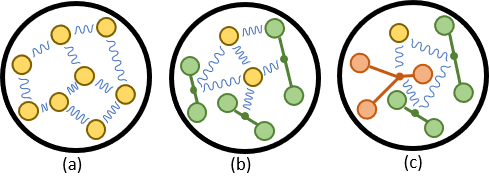

In [5]:
Image(filename="imgs/cluster_expansion.png",width=400,height=400)

# Fig. 2 & 3

## Dynamic Behaviour

### SHG

In [5]:
##parameters
delta_a=0
delta_b=0
kappa_a=2
kappa_b=2
psi0_l=[0,0]
E=6; g=0.4
op=BuildOperator_SHG(E,g)

QuTip

In [6]:
tlist=np.linspace(0,5,1000)
output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])

QCLS

In [7]:
H=[['Aa',delta_a],['Bb',delta_b],['AAb',g],['aaB',g],['A',E],['a',E]] 
Co_ps=[['a',kappa_a],['b',kappa_b]]
T_o=['Aa','Bb']
order=4

In [8]:
data=Data.Data(H, Co_ps, T_o, order)

In [9]:
sol_qcls=Solver.Solve(data,psi0_l,(0,10),t_eval=tlist)

Mean-Feild

In [10]:
T_o=['a','b']
order=1

In [11]:
data_mean=Data.Data(H, Co_ps, T_o, order)

In [12]:
sol_mean=Solver.Solve(data_mean,psi0_l,(0,10),t_eval=tlist)

Visualize the data

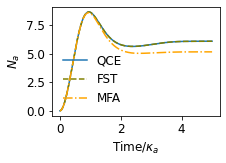

In [14]:
fig, axes = plt.subplots(1,1,figsize=(3,2))

axes.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

axes.plot(tlist, np.real(sol_qcls.y[0]),linestyle='-',label="QCE")

axes.plot(tlist, output.expect[0],linestyle='--',color='olive',label="FST")

axes.plot(tlist, np.real(sol_mean.y[0]*np.conj(sol_mean.y[0])),color='orange',linestyle='-.',label="MFA")

axes.legend(loc=0,ncol=1,frameon=False)

axes.set_xlabel('Time/'+r'$\kappa_a$')
axes.set_ylabel(r'$N_a$')

#fig.savefig('imgs/dynamic_behaviour_SHG_LA.svg',dpi=600,format='svg',bbox_inches='tight')
#fig.savefig('imgs/dynamic_behaviour_SHG_LA.pdf',dpi=600,format='pdf',bbox_inches='tight')

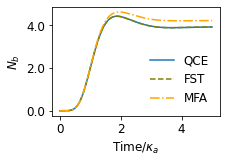

In [15]:
fig, axes = plt.subplots(1,1,figsize=(3,2))

axes.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

axes.plot(tlist, np.real(sol_qcls.y[1]),linestyle='-',label="QCE")

axes.plot(tlist, output.expect[1],linestyle='--',color='olive',label="FST")

axes.plot(tlist, np.real(sol_mean.y[1]*np.conj(sol_mean.y[1])),color='orange',linestyle='-.',label="MFA")

axes.legend(loc=0,ncol=1,frameon=False)

axes.set_xlabel('Time/'+r'$\kappa_a$')
axes.set_ylabel(r'$N_b$')

#fig.savefig('imgs/dynamic_behaviour_SHG_RB.svg',dpi=600,format='svg',bbox_inches='tight')
#fig.savefig('imgs/dynamic_behaviour_SHG_RB.pdf',dpi=600,format='pdf',bbox_inches='tight')

### OPO

In [19]:
#parameters
kappa_a=2
kappa_b=4
psi0_l=[0,0]
E=1; g=0.24
op=BuildOperator_OPO(E,g)

QuTip

In [20]:
tlist=np.linspace(0,10,1000)  
output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])

QCLS

In [21]:
H=[['AAb',g],['aaB',g],['B',E],['b',E]] 
Co_ps=[['a',kappa_a],['b',kappa_b]]
T_o=['Aa','Bb']
order=2

In [22]:
data=Data.Data(H, Co_ps, T_o, order)

In [23]:
sol_qcls=Solver.Solve(data,psi0_l,(0,10),t_eval=tlist)

Mean-Feild

In [24]:
T_o=['a','b']
order=1

In [25]:
data_mean=Data.Data(H, Co_ps, T_o, order)

In [26]:
initial=[0.01j,0]
data_mean.UpdateCoef(0,ForceUpdate=True)
sol_mean=solve_ivp(ConvertToSolver,(0,tlist[-1]),initial,method='RK45',t_eval=tlist,args=(data_mean,))

Visualize the data

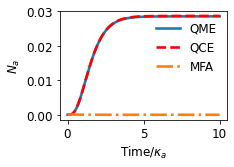

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(3,2))

axes.plot(tlist, output.expect[0],linewidth=2.6,label="QME")

axes.plot(tlist, np.real(sol_qcls.y[0]),linewidth=2.6,linestyle='--',color='red',label="QCE")

axes.plot(tlist, np.real(sol_mean.y[0]*np.conj(sol_mean.y[0])),linewidth=2.6,linestyle='-.',label="MFA")

axes.legend(loc=0,ncol=1,frameon=False)

axes.set_xlabel('Time/'+r'$\kappa_a$')
axes.set_ylabel(r'$N_a$')

#fig.savefig('imgs/dynamic_behaviour_OPO_LA.svg',dpi=600,format='svg',bbox_inches='tight')
#fig.savefig('imgs/dynamic_behaviour_OPO_LA.pdf',dpi=600,format='pdf',bbox_inches='tight')

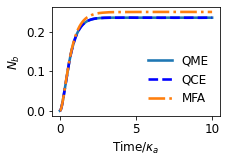

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(3,2))

axes.plot(tlist, output.expect[1],linewidth=2.6,label="QME")

axes.plot(tlist, np.real(sol_qcls.y[1]),linewidth=2.6,linestyle='--',color='blue',label="QCE")

axes.plot(tlist, np.real(sol_mean.y[1]*np.conj(sol_mean.y[1])),linewidth=2.6,linestyle='-.',label="MFA")

axes.legend(loc=0,ncol=1,frameon=False)

axes.set_xlabel('Time/'+r'$\kappa_a$')
axes.set_ylabel(r'$N_b$')

#fig.savefig('imgs/dynamic_behaviour_OPO_RB.svg',dpi=600,format='svg',bbox_inches='tight')
#fig.savefig('imgs/dynamic_behaviour_OPO_RB.pdf',dpi=600,format='pdf',bbox_inches='tight')

## Steady State Various E 

### SHG

In [110]:
#parameters
delta_a=0
delta_b=0
kappa_a=2
kappa_b=2
initial=[0,0]
psi0_l=[0,0]
g=0.2
E_list_beThre=np.linspace(0.2,15,30)
E_list_afThre=np.linspace(15.2,22,20)
E_list=np.asarray(E_list_beThre.tolist()+E_list_afThre.tolist())
#E_list_qutip=np.linspace(0.2,2,20)
tlist=np.linspace(0,10,10000)

QCLS

In [111]:
H=[['Aa',delta_a],['Bb',delta_b],['AAb',1],['aaB',1],['A',2],['a',2]] 
Co_ps=[['a',kappa_a],['b',kappa_b]];
T_o=['Aa','Bb'];

In [112]:
sol_qcls=np.zeros([np.size(E_list),2])
data=Data.Data(H, Co_ps, T_o, 4)

In [113]:
for j in range(0,np.size(E_list)):
    data.SetCoefHOList([delta_a,delta_b,g,g,E_list[j],E_list[j]])
    output=Solver.Solve(data,initial,(0,tlist[-1]),t_eval=tlist)
    sol_qcls[j][0]=np.real(output.y[0][-1])
    sol_qcls[j][1]=np.real(output.y[1][-1])

Mean-Feild

In [114]:
T_o=['A','B']
order=1

In [115]:
sol_mean=np.zeros([np.size(E_list),2])
tlist=np.linspace(0,10,10000)

In [116]:
data_mean=Data.Data(H, Co_ps, ['A','B'], 1)
for j in range(0,np.size(E_list)):
    data_mean.SetCoefHOList([delta_a,delta_b,g,g,E_list[j],E_list[j]])
    data_mean.UpdateCoef(0,ForceUpdate=True)
    initial=[0.1+0.1j,0]
    output=solve_ivp(ConvertToSolver,(0,tlist[-1]),initial,method='RK45',t_eval=tlist,args=(data_mean,))
    sol_mean[j][0]=np.real(output.y[0][-1]*np.conj(output.y[0][-1]))
    sol_mean[j][1]=np.real(output.y[1][-1]*np.conj(output.y[1][-1]))

Qutip

In [117]:
#sol_qutip=np.zeros([np.size(E_list_qutip),2])

In [118]:
 '''
    for j in range(0,np.size(E_list_qutip)):
        op=BuildOperator_SHG(E_list_qutip[j],g)
        output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])
        n_a=output.expect[0];n_b=output.expect[1]
        sol_qutip[j][0]=n_a[-1];sol_qutip[j][1]=n_b[-1]
'''

"\n   for j in range(0,np.size(E_list_qutip)):\n       op=BuildOperator_SHG(E_list_qutip[j],g)\n       output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])\n       n_a=output.expect[0];n_b=output.expect[1]\n       sol_qutip[j][0]=n_a[-1];sol_qutip[j][1]=n_b[-1]\n"

Visualize the data

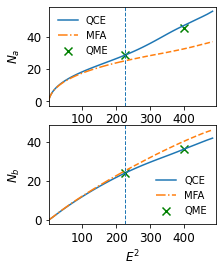

In [120]:
fig, axes = plt.subplots(2,1 , figsize=(3,4))

axes[0].set_xlim(E_list[0]*E_list[0],E_list[-1]*E_list[-1]+10);axes[1].set_xlim(E_list[0]*E_list[0],E_list[-1]*E_list[-1]+10)
axes[0].set_xlabel(r'$E^2$');axes[1].set_xlabel(r'$E^2$')
                   
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

x_major_locator=MultipleLocator(100)
axes[0].xaxis.set_major_locator(x_major_locator)
axes[1].xaxis.set_major_locator(x_major_locator)

axes[0].plot(E_list_beThre*E_list_beThre,sol_qcls[:30,0],color='#1f77b4',linestyle='-',label='QCE')
axes[1].plot(E_list_beThre*E_list_beThre,sol_qcls[:30,1],color='#1f77b4',linestyle='-',label='QCE')

axes[0].plot(E_list_afThre*E_list_afThre,sol_qcls[30:,0],color='#1f77b4',linestyle='-')
axes[1].plot(E_list_afThre*E_list_afThre,sol_qcls[30:,1],color='#1f77b4',linestyle='-')

#axes[0].plot(E_list_qutip*E_list_qutip,sol_qutip[...,0],linestyle='--',label='FSR')
#axes[1].plot(E_list_qutip*E_list_qutip,sol_qutip[...,1],linestyle='--',label='FSR')

axes[0].plot(E_list_beThre*E_list_beThre,sol_mean[:30,0],color='#ff7f0e',linestyle='-.',label='MFA')
axes[1].plot(E_list_beThre*E_list_beThre,sol_mean[:30,1],color='#ff7f0e',linestyle='-.',label='MFA')

axes[0].plot(E_list_afThre*E_list_afThre,sol_mean[30:,0],color='#ff7f0e',linestyle='--')
axes[1].plot(E_list_afThre*E_list_afThre,sol_mean[30:,1],color='#ff7f0e',linestyle='--')

axes[0].scatter(225, 28.611,c='green',s=64,marker = 'x',label='QME')
axes[1].scatter(225, 23.797,c='green',s=64,marker = 'x',label='QME')

axes[0].scatter(400, 45.280,c='green',s=64,marker = 'x')
axes[1].scatter(400, 36.430,c='green',s=64,marker = 'x')

axes[0].legend(loc=0,ncol=1,frameon=False,fontsize=10,markerscale=1); 
axes[1].legend(loc=0,ncol=1,frameon=False,fontsize=10,markerscale=1);

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

axes[0].axvline(x=225, color='#1f77b4',linestyle='--',linewidth='1');
axes[1].axvline(x=225, color='#1f77b4',linestyle='--',linewidth='1');

axes[0].set_ylabel(r'$N_a$')
axes[1].set_ylabel(r'$N_b$')    

#fig.savefig('imgs/steady_state_various_E_SHG.svg',dpi=600,format='svg',bbox_inches='tight')
fig.savefig('imgs/steady_state_various_E_SHG.pdf',dpi=600,format='pdf',bbox_inches='tight')

### Various E vesus Time

In [5]:
delta_a=0
delta_b=0
kappa_a=2
kappa_b=2
psi0_l=[0,0]
g=0.2
E_list=np.linspace(0.2,6,50)
tlist=np.linspace(0,10,10000)

qutip

In [6]:
time_qutip=np.zeros([np.size(E_list),1])

In [7]:
n=0;
N=np.size(E_list)
for i in range(0,np.size(E_list)):
    op=BuildOperator_SHG(E_list[i],g)
    tic=time.time()
    output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])
    toc=time.time()
    t_qutip=toc-tic     
    n=n+1
    time_qutip[i][0]=t_qutip
    print("->complete:",end=' ')
    print("%.3g" %(n/N*100)+'%',end=' ')

->complete: 2% ->complete: 4% ->complete: 6% ->complete: 8% ->complete: 10% ->complete: 12% ->complete: 14% ->complete: 16% ->complete: 18% ->complete: 20% ->complete: 22% ->complete: 24% ->complete: 26% ->complete: 28% ->complete: 30% ->complete: 32% ->complete: 34% ->complete: 36% ->complete: 38% ->complete: 40% ->complete: 42% ->complete: 44% ->complete: 46% ->complete: 48% ->complete: 50% ->complete: 52% ->complete: 54% ->complete: 56% ->complete: 58% ->complete: 60% ->complete: 62% ->complete: 64% ->complete: 66% ->complete: 68% ->complete: 70% ->complete: 72% ->complete: 74% ->complete: 76% ->complete: 78% ->complete: 80% ->complete: 82% ->complete: 84% ->complete: 86% ->complete: 88% ->complete: 90% ->complete: 92% ->complete: 94% ->complete: 96% ->complete: 98% ->complete: 100% 

QCLS

In [8]:
orders=range(2,7)
time_qcls=np.zeros([np.size(orders),np.size(E_list)])

In [9]:
H=[['Aa',delta_a],['Bb',delta_b],['AAb',1],['aaB',1],['A',2],['a',2]] 
Co_ps=[['a',kappa_a],['b',kappa_b]];
T_o=['Aa','Bb'];

In [10]:
n=0;
N=np.size(orders)*np.size(E_list)
for order in orders:
    data=Data.Data(H, Co_ps, T_o, order)
    for j in range(0,np.size(E_list)):
        data.SetCoefHOList([delta_a,delta_b,g,g,E_list[j],E_list[j]])        
        tic=time.time()
        output=Solver.Solve(data,[0,0],(0,tlist[-1]),t_eval=tlist)
        toc=time.time()
        t_cluster=toc-tic   
        n=n+1
        time_qcls[order-2][j]=t_cluster
    print("->complete: "+str(n/N*100)+'%')

->complete: 20.0%
->complete: 40.0%
->complete: 60.0%
->complete: 80.0%
->complete: 100.0%


Visualize the data

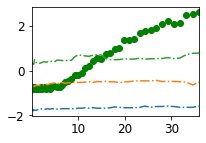

In [12]:
fig, axes = plt.subplots(1,1 , figsize=(3,2))
axes.set_xlim(E_list[0]*E_list[0],E_list[-1]*E_list[-1])
#axes.set_xlabel(r'$E^2$');
#axes.plot(E_list*E_list,time_qutip[...,0],color='green',linestyle='-',label='QME')
axes.scatter(E_list*E_list,np.log10(time_qutip[...,0]),color='green',linestyle='-',label='FST')
for order in [2,4,6]:
    axes.plot(E_list*E_list,np.log10(time_qcls[order-2,...]),linestyle='-.',label='Order-'+str(order)+'-QCE')
#axes.legend(loc=0,ncol=2,frameon=False);
#axes.set_ylabel(r'$Time/s$')
#fig.savefig('imgs/time_various_E_SHG.pdf',dpi=600,format='pdf',bbox_inches='tight')
#fig.savefig('imgs/time_various_E_SHG.svg',dpi=600,format='svg',bbox_inches='tight')

### OPO

In [5]:
#parameters
kappa_a=2.0
kappa_b=4.0
initial=[0,0]
g=0.24
psi0_l=[0,0]
E_list=np.linspace(0.2,6,100)
E_list_qutip=np.linspace(0.2,1,20)
tlist=np.linspace(0,10,10000)

QCLS

In [6]:
sol_qcls=np.zeros([np.size(E_list),2])

In [7]:
H=[['AAb',1],['aaB',1],['B',2],['b',2]] 
Co_ps=[['a',kappa_a],['b',kappa_b]];
T_o=['Aa','Bb'];

In [8]:
data_qcls=Data.Data(H, Co_ps, T_o, 4)
for j in range(0,np.size(E_list)):
    data_qcls.SetCoefHOList([g,g,E_list[j],E_list[j]])
    output=Solver.Solve(data_qcls,initial,(0,tlist[-1]),t_eval=tlist)
    sol_qcls[j][0]=np.real(output.y[0][-1])
    sol_qcls[j][1]=np.real(output.y[1][-1])

Mean-Feild

In [9]:
T_o=['A','B'];

In [10]:
sol_mean=np.zeros([np.size(E_list),2])
tlist=np.linspace(0,40,10000)

In [17]:
data_mean=Data.Data(H, Co_ps, T_o, 1)
Ec=kappa_a*kappa_b/(8*g)
for j in range(0,np.size(E_list)):
    '''
    data_mean.SetCoefHOList([g,g,E_list[j],E_list[j]])
    data_mean.UpdateCoef(0,ForceUpdate=True)
    initial=[0.1j,0j]
    output=solve_ivp(ConvertToSolver,(0,tlist[-1]),initial,method='RK45',t_eval=tlist,args=(data_mean,))
    sol_mean[j][0]=np.real(output.y[0][-1]*np.conj(output.y[0][-1]))
    sol_mean[j][1]=np.real(output.y[1][-1]*np.conj(output.y[1][-1]))
    '''
    #Theoretic result
    if (E_list[j]<Ec) :
        sol_mean[j][0]=0
        sol_mean[j][1]=4*(E_list[j]/kappa_b)**2
    else:
        sol_mean[j][0]=(E_list[j]-Ec)/g
        sol_mean[j][1]=(kappa_a/(4*g))**2

QuTip

In [18]:
#tlist=np.linspace(0,10,10000)

In [19]:
#sol_qutip=np.zeros([np.size(E_list_qutip),2])

In [20]:
 '''
    for j in range(0,np.size(E_list_qutip)):
        op=BuildOperator_OPO(E_list_qutip[j],g)
        output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])
        n_a=output.expect[0];n_b=output.expect[1]
        sol_qutip[j][0]=n_a[-1];sol_qutip[j][1]=n_b[-1]
'''

"\n   for j in range(0,np.size(E_list_qutip)):\n       op=BuildOperator_OPO(E_list_qutip[j],g)\n       output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])\n       n_a=output.expect[0];n_b=output.expect[1]\n       sol_qutip[j][0]=n_a[-1];sol_qutip[j][1]=n_b[-1]\n"

Visualize the data

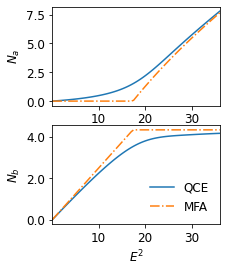

In [24]:
fig, axes = plt.subplots(2,1 , figsize=(3,4))

axes[0].set_xlim(E_list[0]*E_list[0],E_list[-1]*E_list[-1]);axes[1].set_xlim(E_list[0]*E_list[0],E_list[-1]*E_list[-1])
axes[0].set_xlabel(r'$E^2$');axes[1].set_xlabel(r'$E^2$')

axes[0].plot(E_list*E_list,sol_qcls[...,0],linestyle='-',label='QCE')
axes[1].plot(E_list*E_list,sol_qcls[...,1],linestyle='-',label='QCE')

#axes[0].plot(E_list_qutip*E_list_qutip,sol_qutip[...,0],linestyle='--',label='FSR')
#axes[1].plot(E_list_qutip*E_list_qutip,sol_qutip[...,1],linestyle='--',label='FSR')

axes[0].plot(E_list*E_list,sol_mean[...,0],linestyle='-.',label='MFA')
axes[1].plot(E_list*E_list,sol_mean[...,1],linestyle='-.',label='MFA')

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


#axes[0].legend(loc=0,frameon=False,markerscale=0.5); 
axes[1].legend(loc=0,frameon=False);

#axes[0].axvline(x=E_list_qutip[-1]*E_list_qutip[-1], color='#d46061', linewidth=1);
#axes[1].axvline(x=E_list_qutip[-1]*E_list_qutip[-1], color='#d46061', linewidth=1);

axes[0].set_ylabel(r'$N_a$')
axes[1].set_ylabel(r'$N_b$')    

#fig.savefig('imgs/ steady_state_various_E_OPO_large.svg',dpi=600,format='svg',bbox_inches='tight')
#fig.savefig('imgs/ steady_state_various_E_OPO_large.pdf',dpi=600,format='pdf',bbox_inches='tight')

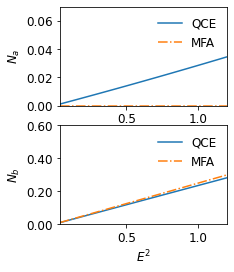

In [25]:
fig, axes = plt.subplots(2,1 , figsize=(3,4))

axes[0].set_xlim(E_list[0]*E_list[0],E_list_qutip[-1]*E_list_qutip[-1]*1.2);axes[1].set_xlim(E_list[0]*E_list[0],E_list_qutip[-1]*E_list_qutip[-1]*1.2)
axes[0].set_ylim(0,0.07);axes[1].set_ylim(0,0.6)
axes[0].set_xlabel(r'$E^2$');axes[1].set_xlabel(r'$E^2$')

axes[0].plot(E_list*E_list,sol_qcls[...,0],linestyle='-',label='QCE')
axes[1].plot(E_list*E_list,sol_qcls[...,1],linestyle='-',label='QCE')

#axes[0].plot(E_list_qutip*E_list_qutip,sol_qutip[...,0],linestyle='--',label='FSR')
#axes[1].plot(E_list_qutip*E_list_qutip,sol_qutip[...,1],linestyle='--',label='FSR')

axes[0].plot(E_list*E_list,sol_mean[...,0],linestyle='-.',label='MFA')
axes[1].plot(E_list*E_list,sol_mean[...,1],linestyle='-.',label='MFA')

axes[0].legend(loc=0,frameon=False); axes[1].legend(loc=0,frameon=False);

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


#axes[0].axvline(x=E_list_qutip[-1]*E_list_qutip[-1], color='#d46061', linewidth=1);
#axes[1].axvline(x=E_list_qutip[-1]*E_list_qutip[-1], color='#d46061', linewidth=1);

axes[0].set_ylabel(r'$N_a$')
axes[1].set_ylabel(r'$N_b$')    

#fig.savefig('imgs/ steady_state_various_E_OPO_zoom.svg',dpi=600,format='svg',bbox_inches='tight')

## Steady State Various g

### SHG

In [54]:
#parameters
delta_a=0
delta_b=0
kappa_a=2
kappa_b=2
initial=[0,0]
E=10
g_list_beThre=np.linspace(0.1,0.3,30)
g_list_afThre=np.linspace(0.31,0.4,20)
g_list=np.asarray(g_list_beThre.tolist()+g_list_afThre.tolist())
tlist=np.linspace(0,10,10000)


QCLS

In [55]:
H=[['Aa',delta_a],['Bb',delta_b],['AAb',1],['aaB',1],['A',2],['a',2]] 
Co_ps=[['a',kappa_a],['b',kappa_b]];
T_o=['Aa','Bb'];

In [56]:
sol_qcls=np.zeros([np.size(g_list),2])
data=Data.Data(H, Co_ps, T_o, 4)

In [57]:
for j in range(0,np.size(g_list)):
    data.SetCoefHOList([delta_a,delta_b,g_list[j],g_list[j],E,E])
    output=Solver.Solve(data,initial,(0,tlist[-1]),t_eval=tlist)
    sol_qcls[j][0]=np.real(output.y[0][-1])
    sol_qcls[j][1]=np.real(output.y[1][-1])

Mean-Feild

In [58]:
T_o=['A','B']
order=1

In [59]:
sol_mean=np.zeros([np.size(g_list),2])

In [60]:
data_mean=Data.Data(H, Co_ps, ['A','B'], 1)
for j in range(0,np.size(g_list)):
        data_mean.SetCoefHOList([delta_a,delta_b,g_list[j],g_list[j],E,E])
        output=Solver.Solve(data_mean,initial,(0,tlist[-1]),t_eval=tlist)
        sol_mean[j][0]=np.real(output.y[0][-1]*np.conj(output.y[0][-1]))
        sol_mean[j][1]=np.real(output.y[1][-1]*np.conj(output.y[1][-1]))

QuTip

In [61]:
#sol_qutip=np.zeros([np.size(g_list),2])

In [62]:
'''
for j in range(0,np.size(g_list)):
        op=BuildOperator_SHG(E,g_list[j])
        output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])
        n_a=output.expect[0];n_b=output.expect[1]
        sol_qutip[j][0]=n_a[-1];sol_qutip[j][1]=n_b[-1]
'''

"\nfor j in range(0,np.size(g_list)):\n        op=BuildOperator_SHG(E,g_list[j])\n        output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])\n        n_a=output.expect[0];n_b=output.expect[1]\n        sol_qutip[j][0]=n_a[-1];sol_qutip[j][1]=n_b[-1]\n"

Visualize the data

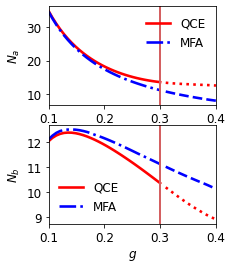

In [64]:
fig, axes = plt.subplots(2,1 , figsize=(3,4))

axes[0].set_xlim(g_list[0],g_list[-1]);axes[1].set_xlim(g_list[0],g_list[-1])
axes[0].set_xlabel(r'$g$');axes[1].set_xlabel(r'$g$')

#axes[0].plot(g_list,sol_qutip[...,0],linestyle='--',label='mesolve')
#axes[1].plot(g_list,sol_qutip[...,1],linestyle='--',label=' mesolve')

axes[0].plot(g_list_beThre,sol_qcls[:30,0],linewidth=2.6,c='r',linestyle='-',label='QCE')
axes[1].plot(g_list_beThre,sol_qcls[:30,1],linewidth=2.6,c='r',linestyle='-',label='QCE')

axes[0].plot(g_list_afThre,sol_qcls[30:,0],linewidth=2.6,c='r',linestyle=':')
axes[1].plot(g_list_afThre,sol_qcls[30:,1],linewidth=2.6,c='r',linestyle=':')

axes[0].plot(g_list_beThre,sol_mean[:30,0],linewidth=2.6,c='b',linestyle='-.',label='MFA')
axes[1].plot(g_list_beThre,sol_mean[:30,1],linewidth=2.6,c='b',linestyle='-.',label='MFA')

axes[0].plot(g_list_afThre,sol_mean[30:,0],linewidth=2.6,c='b',linestyle='--')
axes[1].plot(g_list_afThre,sol_mean[30:,1],linewidth=2.6,c='b',linestyle='--')

axes[0].legend(loc=0,frameon=False); axes[1].legend(loc=0,frameon=False);

axes[0].set_ylabel(r'$N_a$')
axes[1].set_ylabel(r'$N_b$')        

axes[0].axvline(x=0.3, color='#d46061', linewidth=2);
axes[1].axvline(x=0.3, color='#d46061', linewidth=2);

#fig.savefig('imgs/ steady_state_various_g_SHG.svg',dpi=600,format='svg',bbox_inches='tight')
#fig.savefig('imgs/ steady_state_various_g_SHG.pdf',dpi=600,format='pdf',bbox_inches='tight')

### OPO

In [5]:
#parameters
kappa_a=2
kappa_b=4
psi0_l=[0,0]
initial=[0,0]
E=20
g_list=np.linspace(0.01,0.12,50)
tlist=np.linspace(0,10,10000)

QCLS

In [6]:
sol_qcls=np.zeros([np.size(g_list),2])

In [7]:
H=[['AAb',1],['aaB',1],['B',2],['b',2]] 
Co_ps=[['a',kappa_a],['b',kappa_b]];
T_o=['Aa','Bb'];

In [8]:
data_qcls=Data.Data(H, Co_ps, T_o, 4)
for j in range(0,np.size(g_list)):
        data_qcls.SetCoefHOList([g_list[j],g_list[j],E,E])
        output=Solver.Solve(data_qcls,initial,(0,tlist[-1]),t_eval=tlist)
        sol_qcls[j][0]=np.real(output.y[0][-1])
        sol_qcls[j][1]=np.real(output.y[1][-1])

Mean-Feild

In [9]:
T_o=['A','B']
order=1

In [10]:
sol_mean=np.zeros([np.size(g_list),2])
tlist=np.linspace(0,40,10000)

In [11]:
def ConvertToSolver(t,y,data):
    data.SetCurrentValue(y.tolist())
    dy=np.asarray(data.Calculate())
    return dy

In [12]:
data_mean=Data.Data(H, Co_ps, T_o, 1)
gc=kappa_a*kappa_b/(8*E)
for j in range(0,np.size(g_list)):
    '''
    data_mean.SetCoefHOList([g_list[j],g_list[j],E,E])
    data_mean.UpdateCoef(0,ForceUpdate=True)
    initial=[0.1j,0j]
    output=solve_ivp(ConvertToSolver,(0,tlist[-1]),initial,method='RK45',t_eval=tlist,args=(data_mean,))
    sol_mean[j][0]=np.real(output.y[0][-1]*np.conj(output.y[0][-1]))
    sol_mean[j][1]=np.real(output.y[1][-1]*np.conj(output.y[1][-1]))
    '''
    #Theoretic result
    Ec=kappa_a*kappa_b/(8*g_list[j])
    if (g_list[j]<gc) :
        sol_mean[j][0]=0
        sol_mean[j][1]=4*(E/kappa_b)**2
    else:
        sol_mean[j][0]=(E-Ec)/g_list[j]
        sol_mean[j][1]=(kappa_a/(4*g_list[j]))**2

QuTip

In [13]:
#tlist=np.linspace(0,10,10000)

In [14]:
#sol_qutip=np.zeros([np.size(g_list),2])

In [15]:
'''
for j in range(0,np.size(g_list)):
        op=BuildOperator_OPO(E,g_list[j])
        output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])
        n_a=output.expect[0];n_b=output.expect[1]
        sol_qutip[j][0]=n_a[-1];sol_qutip[j][1]=n_b[-1]
'''

"\nfor j in range(0,np.size(g_list)):\n        op=BuildOperator_OPO(E,g_list[j])\n        output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])\n        n_a=output.expect[0];n_b=output.expect[1]\n        sol_qutip[j][0]=n_a[-1];sol_qutip[j][1]=n_b[-1]\n"

Visualize the data

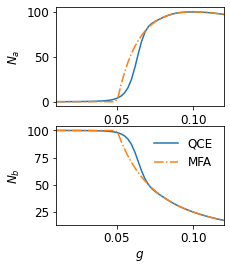

In [17]:
fig, axes = plt.subplots(2,1 , figsize=(3,4))

axes[0].set_xlim(g_list[0],g_list[-1]);axes[1].set_xlim(g_list[0],g_list[-1])
axes[0].set_xlabel(r'$g$');axes[1].set_xlabel(r'$g$')

axes[0].plot(g_list,sol_qcls[...,0],linestyle='-',label='QCE')
axes[1].plot(g_list,sol_qcls[...,1],linestyle='-',label='QCE')

#axes[0].plot(g_list,sol_qutip[...,0],linestyle='--',label='mesolve')
#axes[1].plot(g_list,sol_qutip[...,1],linestyle='--',label=' mesolve')

axes[0].plot(g_list,sol_mean[...,0],linestyle='-.',label='MFA')
axes[1].plot(g_list,sol_mean[...,1],linestyle='-.',label='MFA')

#axes[0].legend(loc=0,frameon=False); 
axes[1].legend(loc=0,frameon=False);


axes[0].set_ylabel(r'$N_a$')
axes[1].set_ylabel(r'$N_b$')    

#fig.savefig('imgs/ steady_state_various_g_OPO.svg',dpi=600,format='svg',bbox_inches='tight')
#fig.savefig('imgs/ steady_state_various_g_OPO.pdf',dpi=600,format='pdf',bbox_inches='tight')

# Fig. 4

### SHG

In [18]:
#parameters
delta_a=0
delta_b=0
kappa_a=2
kappa_b=2
initial=[0,0]
E_list=np.linspace(1,10,20)
g_list=np.linspace(0.1,0.4,20)
tlist=np.linspace(0,10,10000)

QCLS

In [19]:
H=[['Aa',delta_a],['Bb',delta_b],['AAb',1],['aaB',1],['A',2],['a',2]] 
Co_ps=[['a',kappa_a],['b',kappa_b]];
T_o=['Aa','Bb','AAaa','BBbb'];

In [20]:
sol_qcls=np.zeros([np.size(E_list),np.size(g_list),2])
data=Data.Data(H, Co_ps, T_o, 6)

In [21]:
for i in range(0,np.size(g_list)):
    for j in range(0,np.size(E_list)):
            data.SetCoefHOList([delta_a,delta_b,g_list[i],g_list[i],E_list[j],E_list[j]])
            output=Solver.Solve(data,initial,(0,tlist[-1]),t_eval=tlist)
            sol_qcls[i][j][0]=np.real(output.y[2][-1])/pow(np.real(output.y[0][-1]),2)
            sol_qcls[i][j][1]=np.real(output.y[3][-1])/pow(np.real(output.y[1][-1]),2)
    print("Completed:"+str(i+1)+"/"+str(np.size(E_list)))

Completed:1/20
Completed:2/20
Completed:3/20
Completed:4/20
Completed:5/20
Completed:6/20
Completed:7/20
Completed:8/20
Completed:9/20
Completed:10/20
Completed:11/20
Completed:12/20
Completed:13/20
Completed:14/20
Completed:15/20
Completed:16/20
Completed:17/20
Completed:18/20
Completed:19/20
Completed:20/20


Visualize the data

In [23]:
E, g = np.meshgrid(E_list, g_list)

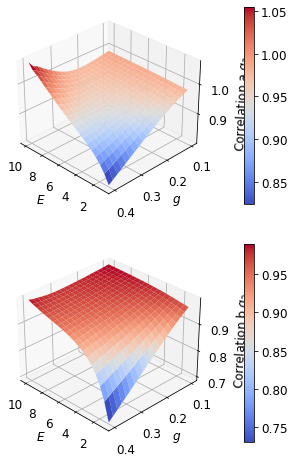

In [24]:
fig = plt.figure(figsize=(7,8))
axes=[]
axes.append(fig.add_subplot(2, 1, 1, projection='3d'))
axes.append(fig.add_subplot(2, 1, 2, projection='3d'))

ax0=axes[0].plot_surface(E,g,sol_qcls[:,:,0] , cmap=cm.coolwarm)

ax1=axes[1].plot_surface(E,g,sol_qcls[:,:,1] , cmap=cm.coolwarm)

axes[0].set_xlabel(r'$E$');axes[1].set_xlabel(r'$E$')
axes[0].set_ylabel(r'$g$');axes[1].set_ylabel(r'$g$')
axes[0].set_zlabel('Correlation a '+r'$g_{2}$');axes[1].set_zlabel('Correlation b '+r'$g_{2}$')

fig.colorbar(ax0,ax=axes[0],pad=0.1)
fig.colorbar(ax1,ax=axes[1],pad=0.1)

axes[0].view_init(elev=30, azim=135)
axes[1].view_init(elev=30, azim=135)

plt.show()

#fig.savefig('imgs/steady_state_g2_various_gE_SHG.svg',dpi=600,format='svg',bbox_inches='tight')

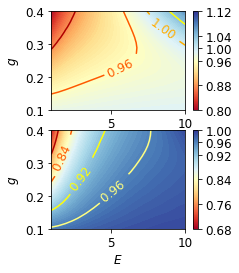

In [25]:
fig = plt.figure(figsize=(3,4))
axes=[]
axes.append(fig.add_subplot(2, 1, 1))
axes.append(fig.add_subplot(2, 1, 2))

#ax0=axes[0].contourf(E,g,sol_qcls[:,:,0],[0.80,0.88,0.96,1.00,1.04,1.12],cmap=cm.coolwarm)
ax0=axes[0].contourf(E,g,sol_qcls[:,:,0],np.linspace(0.80,1.12,100),cmap=cm.RdYlBu)
#ax0=axes[0].contourf(E,g,sol_qcls[:,:,0],[0.80,0.88,0.96,1.00,1.04,1.12],cmap=cm.RdYlGn)
#ax1=axes[1].contourf(E,g,sol_qcls[:,:,1],[0.68,0.76,0.84,0.92,0.96,1.00],cmap=cm.coolwarm)
ax1=axes[1].contourf(E,g,sol_qcls[:,:,1],np.linspace(0.68,1.00,100),cmap=cm.RdYlBu)
#ax1=axes[1].contourf(E,g,sol_qcls[:,:,1],[0.68,0.76,0.84,0.92,0.96,1.00],cmap=cm.RdYlGn)

ax00=axes[0].contour(E,g,sol_qcls[:,:,0],[0.80,0.88,0.96,1.00,1.04,1.12],cmap=cm.hot)
ax11=axes[1].contour(E,g,sol_qcls[:,:,1],[0.68,0.76,0.84,0.92,0.96,1.00],cmap=cm.hot)

fmt = '%1.2f '

axes[0].clabel(ax00, [0.80,0.88,0.96,1.00,1.04,1.12], inline=True,fmt=fmt)
axes[1].clabel(ax11, [0.68,0.76,0.84,0.92,0.96,1.00], inline=True, fmt=fmt)


axes[0].set_xlabel(r'$E$');axes[1].set_xlabel(r'$E$')
axes[0].set_ylabel(r'$g$');axes[1].set_ylabel(r'$g$')

bar1=fig.colorbar(ax0,ax=axes[0],pad=0.05,ticks=[0.80,0.88,0.96,1.00,1.04,1.12])
bar2=fig.colorbar(ax1,ax=axes[1],pad=0.05,ticks=[0.68,0.76,0.84,0.92,0.96,1.00])

#fig.savefig('imgs/steady_state_g2_various_gE_SHG.svg',dpi=600,format='svg',bbox_inches='tight')
#fig.savefig('imgs/steady_state_g2_various_gE_SHG.pdf',dpi=600,format='pdf',bbox_inches='tight')

### OPO

In [49]:
#parameters
kappa_a=2
kappa_b=4
initial=[0,0]
E_list=np.linspace(2,3.2,20)
g_list=np.linspace(0.1,0.3,20)
tlist=np.linspace(0,10,10000)

QCLS

In [50]:
sol_qcls=np.zeros([np.size(E_list),np.size(g_list),2])

In [51]:
H=[['AAb',1],['aaB',1],['B',2],['b',2]] 
Co_ps=[['a',kappa_a],['b',kappa_b]];
T_o=['Aa','Bb','AAaa','BBbb'];

In [52]:
data_qcls=Data.Data(H, Co_ps, T_o, 6)
for i in range(0,np.size(g_list)):
    for j in range(0,np.size(E_list)):
            data_qcls.SetCoefHOList([g_list[i],g_list[i],E_list[j],E_list[j]])
            output=Solver.Solve(data_qcls,initial,(0,tlist[-1]),t_eval=tlist)
            sol_qcls[i][j][0]=np.real(output.y[2][-1])/pow(np.real(output.y[0][-1]),2)
            sol_qcls[i][j][1]=np.real(output.y[3][-1])/pow(np.real(output.y[1][-1]),2)
    print("Completed:"+str(i+1)+"/"+str(np.size(E_list)))

Completed:1/20
Completed:2/20
Completed:3/20
Completed:4/20
Completed:5/20
Completed:6/20
Completed:7/20
Completed:8/20
Completed:9/20
Completed:10/20
Completed:11/20
Completed:12/20
Completed:13/20
Completed:14/20
Completed:15/20
Completed:16/20
Completed:17/20
Completed:18/20
Completed:19/20
Completed:20/20


Visualize the data

In [54]:
E, g = np.meshgrid(E_list, g_list)

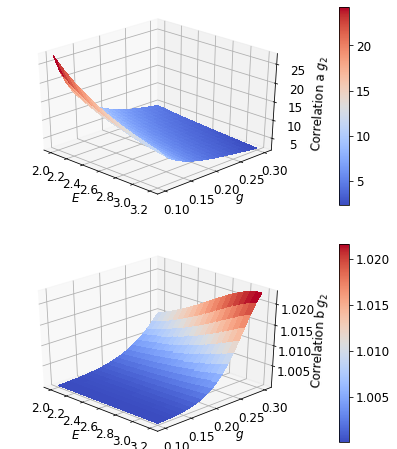

In [55]:
fig = plt.figure(figsize=(7,8))
axes=[]
axes.append(fig.add_subplot(2, 1, 1, projection='3d'))
axes.append(fig.add_subplot(2, 1, 2, projection='3d'))

ax0=axes[0].plot_surface(E, g,sol_qcls[:,:,0] , cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax1=axes[1].plot_surface(E, g,sol_qcls[:,:,1] , cmap=cm.coolwarm,linewidth=0, antialiased=False)

axes[0].set_xlabel(r'$E$');axes[1].set_xlabel(r'$E$')
axes[0].set_ylabel(r'$g$');axes[1].set_ylabel(r'$g$')
axes[0].set_zlabel('Correlation a '+r'$g_{2}$');axes[1].set_zlabel('Correlation b '+r'$g_{2}$')

fig.colorbar(ax0,ax=axes[0],pad=0.1)
fig.colorbar(ax1,ax=axes[1],pad=0.1)

axes[0].view_init(elev=30, azim=-45)
axes[1].view_init(elev=30, azim=-45)

plt.show()

#fig.savefig('imgs/ steady_state_g2_various_gE_OPO.svg',dpi=600,format='svg',bbox_inches='tight')

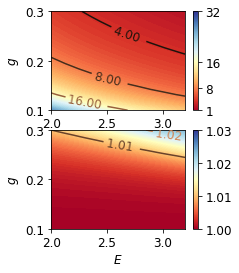

In [58]:
fig = plt.figure(figsize=(3,4))
axes=[]
axes.append(fig.add_subplot(2, 1, 1))
axes.append(fig.add_subplot(2, 1, 2))

#ax0=axes[0].contourf(E,g,sol_qcls[:,:,0],levels=[1,2,4,8,16,32],cmap=cm.coolwarm)
ax0=axes[0].contourf(E,g,sol_qcls[:,:,0],np.linspace(1,32,100),cmap=cm.RdYlBu)
#ax1=axes[1].contourf(E,g,sol_qcls[:,:,1],levels=[1,1.01,1.02,1.03],cmap=cm.coolwarm)
ax1=axes[1].contourf(E,g,sol_qcls[:,:,1],np.linspace(1,1.03,100),cmap=cm.RdYlBu)

ax00=axes[0].contour(E,g,sol_qcls[:,:,0],[1,2,4,8,16,32],cmap=cm.copper)
ax11=axes[1].contour(E,g,sol_qcls[:,:,1],[1,1.01,1.02,1.03],cmap=cm.copper)

fmt = '%1.2f '

axes[0].clabel(ax00, [1,2,4,8,16,32], inline=True,fmt=fmt)
axes[1].clabel(ax11, [1,1.01,1.02,1.03], inline=True, fmt=fmt)

y_major_locator=MultipleLocator(0.1)
axes[0].yaxis.set_major_locator(y_major_locator)
axes[1].yaxis.set_major_locator(y_major_locator)

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


axes[0].set_xlabel(r'$E$');axes[1].set_xlabel(r'$E$')
axes[0].set_ylabel(r'$g$');axes[1].set_ylabel(r'$g$')

bar1=fig.colorbar(ax0,ax=axes[0],pad=0.05,ticks=[1,8,16,32])
bar2=fig.colorbar(ax1,ax=axes[1],pad=0.05,ticks=[1,1.01,1.02,1.03])

#fig.savefig('imgs/ steady_state_g2_various_gE_OPO.svg',dpi=600,format='svg',bbox_inches='tight')
#fig.savefig('imgs/ steady_state_g2_various_gE_OPO.pdf',dpi=600,format='pdf',bbox_inches='tight')

# Fig 5

### SHG

In [5]:
#parameters
delta_a=0
delta_b=0
kappa_a=2
kappa_b=2
initial=[0,0]
psi0_l=[0,0]
E=2
g_list=np.linspace(0.4,1.4,20)
tlist=np.linspace(0,10,10000)

QCLS

In [6]:
orders=range(2,7,2)
sol_qcls=np.zeros([np.size(orders),np.size(g_list),2])

In [7]:
H=[['Aa',delta_a],['Bb',delta_b],['AAb',1],['aaB',1],['A',2],['a',2]] 
Co_ps=[['a',kappa_a],['b',kappa_b]]
T_o=['Aa','Bb']

In [8]:
for i in range(0,len(orders)):
    data_qcls=Data.Data(H, Co_ps, T_o, orders[i])
    for j in range(0,np.size(g_list)):
        data_qcls.SetCoefHOList([delta_a,delta_b,g_list[j],g_list[j],E,E])
        output=Solver.Solve(data_qcls,initial,(0,tlist[-1]),t_eval=tlist)
        sol_qcls[i][j][0]=np.real(output.y[0][-1])
        sol_qcls[i][j][1]=np.real(output.y[1][-1])
    print("Completed:"+str(i+1)+"/"+str(len(orders)))

Completed:1/3
Completed:2/3
Completed:3/3


QuTip

In [9]:
sol_qutip=np.zeros([np.size(g_list),2])

In [10]:
for j in range(0,np.size(g_list)):
        op=BuildOperator_SHG(E,g_list[j])
        output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])
        n_a=output.expect[0];n_b=output.expect[1]
        sol_qutip[j][0]=n_a[-1];sol_qutip[j][1]=n_b[-1]

Visualize the data

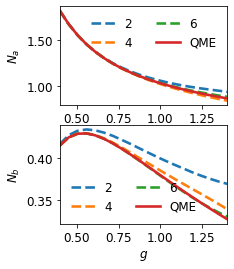

In [12]:
fig, axes = plt.subplots(2,1 , figsize=(3,4))

axes[0].set_xlim(g_list[0],g_list[-1]);axes[1].set_xlim(g_list[0],g_list[-1])

axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

axes[0].set_xlabel(r'$g$');axes[1].set_xlabel(r'$g$')

for i in range(0,len(orders)):
    axes[0].plot(g_list,sol_qcls[i,...,0],linewidth=2.6,linestyle='--',label=str(orders[i]))
    axes[1].plot(g_list,sol_qcls[i,...,1],linewidth=2.6,linestyle='--',label=str(orders[i]))

axes[0].plot(g_list,sol_qutip[...,0],linewidth=2.6,linestyle='-',label='QME')
axes[1].plot(g_list,sol_qutip[...,1],linewidth=2.6,linestyle='-',label='QME')

axes[0].legend(loc=0,ncol=2,frameon=False); axes[1].legend(loc=0,ncol=2,frameon=False);

axes[0].set_ylabel(r'$N_a$')
axes[1].set_ylabel(r'$N_b$')      

#fig.savefig('imgs/steady_state_various_order_SHG.svg',dpi=600,format='svg',bbox_inches='tight')
#fig.savefig('imgs/steady_state_various_order_SHG.pdf',dpi=600,format='pdf',bbox_inches='tight')

OPO

In [67]:
#parameters
kappa_a=2
kappa_b=4
initial=[0,0]
E=0.8
g_list=np.linspace(0.4,1.6,20)
tlist=np.linspace(0,10,10000)

QCLS

In [68]:
orders=[2,4,6]
sol_qcls=np.zeros([np.size(orders),np.size(g_list),2])

In [69]:
H=[['AAb',1],['aaB',1],['B',2],['b',2]] 
Co_ps=[['a',kappa_a],['b',kappa_b]];
T_o=['Aa','Bb'];

In [70]:
for i in range(0,len(orders)):
    data_qcls=Data.Data(H, Co_ps, T_o, orders[i])
    for j in range(0,np.size(g_list)):
        data_qcls.SetCoefHOList([g_list[j],g_list[j],E,E])
        output=Solver.Solve(data_qcls,initial,(0,tlist[-1]),t_eval=tlist)
        sol_qcls[i][j][0]=np.real(output.y[0][-1])
        sol_qcls[i][j][1]=np.real(output.y[1][-1])
    print("Completed:"+str(i+1)+"/"+str(len(orders)))

Completed:1/3
Completed:2/3
Completed:3/3


QuTip

In [71]:
sol_qutip=np.zeros([np.size(g_list),2])

In [72]:
for j in range(0,np.size(g_list)):
        op=BuildOperator_OPO(E,g_list[j])
        output=mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track'])
        n_a=output.expect[0];n_b=output.expect[1]
        sol_qutip[j][0]=n_a[-1];sol_qutip[j][1]=n_b[-1]

Visualize the data

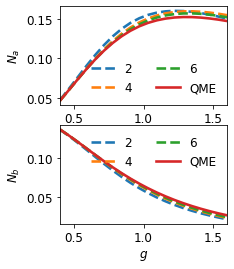

In [74]:
fig, axes = plt.subplots(2,1, figsize=(3,4))

axes[0].set_xlim(g_list[0],g_list[-1]);axes[1].set_xlim(g_list[0],g_list[-1])

axes[0].set_xlabel(r'$g$');axes[1].set_xlabel(r'$g$')

for i in range(0,len(orders)):
    axes[0].plot(g_list,sol_qcls[i,...,0],linewidth=2.6,linestyle='--',label=str(orders[i]))
    axes[1].plot(g_list,sol_qcls[i,...,1],linewidth=2.6,linestyle='--',label=str(orders[i]))

axes[0].plot(g_list,sol_qutip[...,0],linewidth=2.6,linestyle='-',label='QME')
axes[1].plot(g_list,sol_qutip[...,1],linewidth=2.6,linestyle='-',label='QME')

axes[0].legend(loc=0,ncol=2,frameon=False); axes[1].legend(loc=0,ncol=2,frameon=False);

axes[0].set_ylabel(r'$N_a$')
axes[1].set_ylabel(r'$N_b$')     

#fig.savefig('imgs/steady_state_various_order_OPO.pdf',dpi=600,format='pdf',bbox_inches='tight')
#fig.savefig('imgs/steady_state_various_order_OPO.svg',dpi=600,format='svg',bbox_inches='tight')

# Fig 6

## Various modes

In [5]:
H=[]
Co_ps=[]
T_o=[]

In [6]:
M=10
mode=np.linspace(1,M,10)

data_2_num=np.zeros([M,1])
data_4_num=np.zeros([M,1])
data_time=np.zeros([M,1])

In [7]:
for i in range(0,M):
    H.append([chr(65+i),1]);H.append([chr(97+i),1])
    Co_ps.append([chr(97+i),1])
    T_o.append(chr(65+i)+chr(97+i))
    for j in range(0,i):
        H.append([chr(65+i)*2+chr(97+j),1])
        H.append([chr(97+i)*2+chr(65+j),1])
    data_2_qcls=Data.Data(H, Co_ps, T_o, 2)
    data_4_qcls=Data.Data(H, Co_ps, T_o, 4)
    data_2_num[i]=len(data_2_qcls.Calculate())
    data_4_num[i]=len(data_4_qcls.Calculate())
    tic=time.time()
    data_2_qcls.Calculate()
    toc=time.time()
    data_time[i]=toc-tic

In [8]:
data_time=data_time*1000

In [9]:
print(H)

[['A', 1], ['a', 1], ['B', 1], ['b', 1], ['BBa', 1], ['bbA', 1], ['C', 1], ['c', 1], ['CCa', 1], ['ccA', 1], ['CCb', 1], ['ccB', 1], ['D', 1], ['d', 1], ['DDa', 1], ['ddA', 1], ['DDb', 1], ['ddB', 1], ['DDc', 1], ['ddC', 1], ['E', 1], ['e', 1], ['EEa', 1], ['eeA', 1], ['EEb', 1], ['eeB', 1], ['EEc', 1], ['eeC', 1], ['EEd', 1], ['eeD', 1], ['F', 1], ['f', 1], ['FFa', 1], ['ffA', 1], ['FFb', 1], ['ffB', 1], ['FFc', 1], ['ffC', 1], ['FFd', 1], ['ffD', 1], ['FFe', 1], ['ffE', 1], ['G', 1], ['g', 1], ['GGa', 1], ['ggA', 1], ['GGb', 1], ['ggB', 1], ['GGc', 1], ['ggC', 1], ['GGd', 1], ['ggD', 1], ['GGe', 1], ['ggE', 1], ['GGf', 1], ['ggF', 1], ['H', 1], ['h', 1], ['HHa', 1], ['hhA', 1], ['HHb', 1], ['hhB', 1], ['HHc', 1], ['hhC', 1], ['HHd', 1], ['hhD', 1], ['HHe', 1], ['hhE', 1], ['HHf', 1], ['hhF', 1], ['HHg', 1], ['hhG', 1], ['I', 1], ['i', 1], ['IIa', 1], ['iiA', 1], ['IIb', 1], ['iiB', 1], ['IIc', 1], ['iiC', 1], ['IId', 1], ['iiD', 1], ['IIe', 1], ['iiE', 1], ['IIf', 1], ['iiF', 1], ['I

Visualize the data

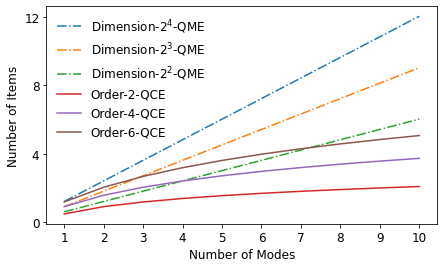

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(7,4))

x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(4)
#axes.set_yscale("symlog")

#axes.set_ylim(0,1000)
axes.plot(mode,mode*np.log10(16),linestyle='-.',label=r'Dimension-$2^4$-QME')
axes.plot(mode,mode*np.log10(8),linestyle='-.',label=r'Dimension-$2^3$-QME')
axes.plot(mode,mode*np.log10(4),linestyle='-.',label=r'Dimension-$2^2$-QME')
#axes.plot(mode, data_2_num,linestyle='-',linewidth=3,label='2')
#axes.plot(mode, data_4_num,linestyle='-',linewidth=3,label='4')
axes.plot(mode, np.log10((mode**2)+2*mode),linestyle='-',label='Order-2-QCE')
axes.plot(mode, np.log10((2*mode**4+10*mode**3+19*mode**2+17*mode)/6),linestyle='-',label='Order-4-QCE')
axes.plot(mode, np.log10((4*mode**6+42*mode**5+175*mode**4+375*mode**3+451*mode**2+303*mode)/90),linestyle='-',label='Order-6-QCE')

axes.xaxis.set_major_locator(x_major_locator)
axes.yaxis.set_major_locator(y_major_locator)

axes.set_xlabel('Number of Modes')
axes.set_ylabel('Number of Items')

axes.legend(loc=0,frameon=False)

#fig.savefig('imgs/various_mode_item.svg',dpi=600,format='svg',bbox_inches='tight')
#fig.savefig('imgs/various_mode_item.pdf',dpi=600,format='pdf',bbox_inches='tight')

In [11]:
def TvsM_f(x,a,b):
    return a*(x**b)

In [12]:
guess=[2,2]
params, params_covariance = optimize.curve_fit(TvsM_f, mode[:], data_time[:,0], guess)
time_fit=TvsM_f(np.linspace(1,M+1,10),params[0],params[1])
print(params)

[2.14378881e-03 3.62758988e+00]


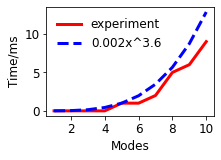

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(3,2))

x_major_locator=MultipleLocator(2)

axes.plot(range(1,M+1), data_time,color='red',linewidth=3,linestyle='-',label='experiment')
axes.plot(range(1,M+1), time_fit,color='blue',linewidth=3,linestyle='--',label=str(round(params[0],3))+'x^'+str(round(params[1],1)))

axes.xaxis.set_major_locator(x_major_locator)

axes.set_xlabel('Modes')
axes.set_ylabel('Time/ms')

axes.legend(loc=0,frameon=False)

#fig.savefig('imgs/various_mode_time.svg',dpi=600,format='svg',bbox_inches='tight')